# *Collating neighborhoods in Toronto*

## Web scrapping of wiki links with the data of postal code in Canada. THis is done using the beautiful soup package 

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
headers={'User-Agent':'Mozilla/5.0'}

In [4]:
response=requests.get(url,headers=headers)
response.status_code

200

In [13]:
soup=BeautifulSoup(response.content,'html.parser')
neigh_table = soup.find_all('table',class_='wikitable sortable')
len(neigh_table)

1

In [14]:
neigh_table=neigh_table [0]

## Write the web scrapped table to a .txt file 

In [21]:
with open ('C:/Users/bijul/Documents/Development/Projects/datascience/Toronto.text','w') as r:
    for row in neigh_table.find_all('tr'):
        for cell in row.find_all('td'):
            r.write(cell.text.ljust(25))
        r.write('\n')

## Import the text file to python, do group by postcode and arrive at the final file

In [5]:
import pandas as pd
df = pd.read_fwf('C:/Users/bijul/Documents/Development/Projects/datascience/Toronto.text').dropna()
df.columns = ['Postcode','Borough','Neighborhood']
df1=df[df.Borough !="Not assigned"]
df1=df1.reset_index(drop=True)
df2 =df1.groupby(['Postcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df2.head(20)


,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Par, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [6]:
df2.shape

(103, 3)

# *Collecting latitude and longitude for the table created above*

In [7]:
 geo = pd.read_csv("Geospatial_Coordinates.csv")
 geo.rename(columns={"Postal Code":"Postcode"}, inplace=True)
 geo.head(6)

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476


In [8]:
final=pd.merge(df2,
              geo[['Postcode','Latitude','Longitude']],
              on='Postcode')
final.tail()

,Postcode,Borough,Neighborhood,Latitude,Longitude
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Garden, Richvi...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437
102,M9W,Etobicoke,Northwest,43.706748,-79.594054


In [9]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... done

# All requested packages already installed.



In [10]:
address = 'Toronto'

geolocator = Nominatim(user_agent="mb_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [11]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [73]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(final['Latitude'], final['Longitude'], final['Borough'], final['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# *Work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data*

In [27]:
Toronto= final[(final['Borough'].str.contains("Toronto"))].reset_index(drop=True)
Toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [79]:
address = 'Downtown Toronto'

geolocator = Nominatim(user_agent="mb_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

The geograpical coordinate are 43.6563221, -79.3809161.


In [80]:
CLIENT_ID = '4O0WL5YWMIFRHGGGHNDX5VOQ5FQHVR2CKIEM5HWDADOFBZZL' # your Foursquare ID
CLIENT_SECRET = '25YG32BC1SDI0TNCFEVMXG11FHEW0QN0PE3RL0USWNQEZJYA' # your Foursquare Secret
VERSION = '20190609' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4O0WL5YWMIFRHGGGHNDX5VOQ5FQHVR2CKIEM5HWDADOFBZZL
CLIENT_SECRET:25YG32BC1SDI0TNCFEVMXG11FHEW0QN0PE3RL0USWNQEZJYA


In [81]:
Toronto.loc[0, 'Neighborhood']

'The Beaches'

In [82]:
neighborhood_latitude = Toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


In [83]:
radius=500
LIMIT=100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4O0WL5YWMIFRHGGGHNDX5VOQ5FQHVR2CKIEM5HWDADOFBZZL&client_secret=25YG32BC1SDI0TNCFEVMXG11FHEW0QN0PE3RL0USWNQEZJYA&v=20190609&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

In [84]:
results = requests.get(url).json()


In [85]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [86]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [87]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [88]:
Toronto_venues = getNearbyVenues(names=Toronto['Neighborhood'],
                                   latitudes=Toronto['Latitude'],
                                   longitudes=Toronto['Longitude']
                                  )


The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesle
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Ce
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toron
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 T
First Canadian Plac, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction South
Parkdale, Roncesva

In [89]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,58,58,58,58,58,58
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail,18,18,18,18,18,18
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",44,44,44,44,44,44
Central Bay Street,83,83,83,83,83,83
"Chinatown, Grange Park, Kensington Market",95,95,95,95,95,95
Christie,17,17,17,17,17,17


In [40]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,"Adelaide, King, Richmond",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.030000,...,0.000000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
1,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.045455,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Business Reply Mail,0.055556,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.1875,0.125,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown, St. James Town",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.022727,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.012048,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.012048,...,0.000000,0.000000,0.00000,0.00,0.012048,0.000000,0.000000,0.012048,0.000000,0.000000
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.010526,0.000000,0.00000,0.00,0.031579,0.000000,0.052632,0.010526,0.000000,0.000000
8,Christie,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesle,0.011765,0.011765,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.011765,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.011765,0.000000,0.011765,0.011765


In [42]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.05
2  Thai Restaurant  0.04
3              Bar  0.04
4       Steakhouse  0.04


----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1          Bakery  0.05
2  Farmers Market  0.03
3    Cocktail Bar  0.03
4     Cheese Shop  0.03


----Brockton, Exhibition Place, Parkdale Village----
                venue  freq
0      Breakfast Spot  0.09
1                Café  0.09
2         Coffee Shop  0.09
3         Yoga Studio  0.05
4  Italian Restaurant  0.05


----Business Reply Mail----
                venue  freq
0  Light Rail Station  0.11
1         Yoga Studio  0.06
2       Auto Workshop  0.06
3          Smoke Shop  0.06
4         Pizza Place  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.19
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3   Harbo

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Steakhouse,Bar,Sushi Restaurant,American Restaurant,Bakery,Restaurant,Breakfast Spot
1,Berczy Park,Coffee Shop,Bakery,Beer Bar,Cocktail Bar,Farmers Market,Steakhouse,Seafood Restaurant,Cheese Shop,Café,Clothing Store
2,"Brockton, Exhibition Place, Parkdale Village",Breakfast Spot,Café,Coffee Shop,Yoga Studio,Stadium,Bar,Italian Restaurant,Bakery,Intersection,Climbing Gym
3,Business Reply Mail,Light Rail Station,Yoga Studio,Auto Workshop,Comic Shop,Pizza Place,Restaurant,Butcher,Burrito Place,Brewery,Skate Park
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Harbor / Marina,Coffee Shop,Sculpture Garden,Boat or Ferry,Bar,Plane,Airport Gate


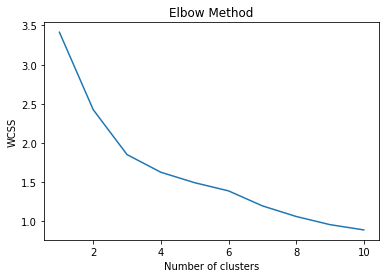

In [112]:
from matplotlib import pyplot as plt
Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=5, random_state=0)
    kmeans.fit(Toronto_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [134]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=100, random_state=0)
kmeans.fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 2, 1])

In [135]:
# add clustering labels
neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head(20) # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Trail,Pub,Wings Joint,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,1,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Restaurant,Cosmetics Shop,Bookstore,Brewery,Bubble Tea Shop
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1,Park,Sandwich Place,Pet Store,Pub,Liquor Store,Light Rail Station,Burger Joint,Burrito Place,Fast Food Restaurant,Italian Restaurant
3,M4M,East Toronto,Studio District,43.659526,-79.340923,1,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Convenience Store,Seafood Restaurant,Brewery,Sandwich Place,Cheese Shop
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Bus Line,Park,Swim School,Wings Joint,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,1,Breakfast Spot,Clothing Store,Food & Drink Shop,Hotel,Convenience Store,Sandwich Place,Park,Gym,Eastern European Restaurant,Dumpling Restaurant
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,1,Clothing Store,Coffee Shop,Sporting Goods Shop,Shoe Store,Salon / Barbershop,Burger Joint,Restaurant,Rental Car Location,Chinese Restaurant,Park
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,1,Pizza Place,Dessert Shop,Sandwich Place,Italian Restaurant,Coffee Shop,Café,Gym,Toy / Game Store,Sushi Restaurant,Fried Chicken Joint
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,Playground,Park,Tennis Court,Restaurant,Wings Joint,Discount Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,1,Coffee Shop,Pub,Light Rail Station,American Restaurant,Sushi Restaurant,Restaurant,Sports Bar,Fried Chicken Joint,Spa,Bagel Shop


In [136]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters